# Paragraph analysis

## Imports

In [1]:
import re
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)


## Load text file

In [2]:
df = pd.read_csv("text.txt", header=None, sep='\n')
paragraph = df.to_string(header=False, index=False).lower()

In [3]:
line_len = paragraph.count('\n')
line_len

21

In [4]:
print(wrapper.fill(paragraph))

   as a term, data analytics predominantly refers to an assortment of
applications, from basic business        intelligence (bi), reporting and online
analytical processing (olap) to various forms of advanced        analytics. in
that sense, it's similar in nature to business analytics, another umbrella term
for  approaches to analyzing data -- with the difference that the latter is
oriented to business uses, while      data analytics has a broader focus. the
expansive view of the term isn't universal, though: in some      cases, people
use data analytics specifically to mean advanced analytics, treating bi as a
separate         category.  data analytics initiatives can help businesses
increase revenues, improve operational           efficiency, optimize marketing
campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the
ultimate goal of         boosting business performance. depending on the
particula

In [5]:
# get unique words, unique word counts and characters counts
words = re.compile("\w+").findall(paragraph)
words_count = dict(Counter(words))
characters = dict(Counter("".join(words)))

In [6]:
print(words_count)

{'as': 2, 'a': 10, 'term': 3, 'data': 18, 'analytics': 10, 'predominantly': 1, 'refers': 1, 'to': 11, 'an': 1, 'assortment': 1, 'of': 10, 'applications': 1, 'from': 2, 'basic': 1, 'business': 4, 'intelligence': 1, 'bi': 2, 'reporting': 1, 'and': 9, 'online': 1, 'analytical': 1, 'processing': 1, 'olap': 1, 'various': 1, 'forms': 1, 'advanced': 2, 'in': 6, 'that': 5, 'sense': 1, 'it': 3, 's': 2, 'similar': 1, 'nature': 1, 'another': 1, 'umbrella': 1, 'for': 2, 'approaches': 1, 'analyzing': 1, 'with': 3, 'the': 11, 'difference': 1, 'latter': 1, 'is': 4, 'oriented': 1, 'uses': 2, 'while': 2, 'has': 2, 'broader': 1, 'focus': 1, 'expansive': 1, 'view': 2, 'isn': 1, 't': 1, 'universal': 1, 'though': 1, 'some': 1, 'cases': 1, 'people': 1, 'use': 1, 'specifically': 1, 'mean': 1, 'treating': 1, 'separate': 1, 'category': 1, 'initiatives': 1, 'can': 5, 'help': 1, 'businesses': 1, 'increase': 1, 'revenues': 1, 'improve': 1, 'operational': 1, 'efficiency': 1, 'optimize': 1, 'marketing': 1, 'campaig

## 3a. What is the probability of the word “data” occurring in each line?

In [7]:
# number of occurrences of "data" in the paragraph
data_count = words_count["data"]

# probability of "data" occuring in each line
data_prob = data_count / line_len
print(f"The probability of the word 'data' occurring in each line is {data_prob:.3f}")

The probability of the word 'data' occurring in each line is 0.857


## Conclusion

The probability of the word 'data' occurring in each line is 0.818.

## 3b. What is the distribution of distinct word counts across all the lines?

In [8]:
# get the number of unique words in each line
unique_words = [len(re.compile("\w+").findall(line)) for line in paragraph.splitlines()]
unique_words_df = pd.DataFrame(unique_words, columns=["unique_words"])
unique_words_df['line_number']=unique_words_df.index
unique_words_df = unique_words_df.reset_index(drop=True)
unique_words_df

,unique_words,line_number
0,15,0
1,13,1
2,16,2
3,16,3
4,18,4
5,15,5
6,11,6
7,12,7
8,16,8
9,13,9


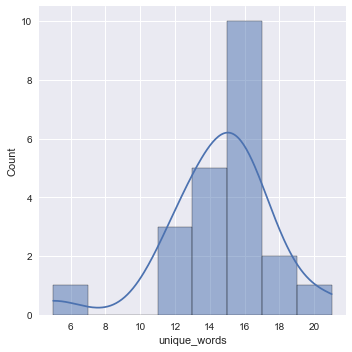

In [9]:
sns.displot(data=unique_words_df, x="unique_words", kde=True);

In [10]:
unique_words_mean = np.mean(unique_words_df["unique_words"])
unique_words_skew = skew(unique_words_df["unique_words"])
print(f"Mean: {unique_words_mean:.3f}, skew: {unique_words_skew:.3f}")

Mean: 14.545, skew: -0.951


## Conclusion

Number of word occurrence is not normally distributed in each line. Occurrence of some
words are significantly higher than others in the lines. Words like "data",
"analytics", "to", "of" appear more than words like "common", "analytical",
"online" in each line.

The distribution is negatively skewed with mean of 14.545.

## 3c. What is the probability of the word “analytics” occurring after the word “data”?

In [11]:
# get the bigrams
analytics_count = words_count['analytics']
cv = CountVectorizer(ngram_range=(2, 2))
X1 = cv.fit_transform(paragraph.splitlines())
features = (cv.get_feature_names())

/home/yusufraji/.pyenv/versions/3.8.8/envs/analytics-evaluation/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Applying TFIDF
tv = TfidfVectorizer(ngram_range=(2, 2))
X2 = tv.fit_transform(paragraph.splitlines())
scores = (X2.toarray())

In [13]:
# get the top ranked features
total = X2.sum(axis=0)
data1 = [(term, total[0, idx]) for idx, term in enumerate(features)]
ranking = pd.DataFrame(data1, columns=['term', 'rank'])
words = (ranking.sort_values('rank', ascending=False))
print("\n\nWords : \n", words.head(7))



Words : 
                  term     rank
81      data analysis  1.03558
82     data analytics  0.98443
191         points of  0.50000
32         and points  0.50000
176           of view  0.50000
238        themes and  0.50000
104  exploratory data  0.49879


In [14]:
# get the top ranked features
total = X2.sum(axis=0)
data1 = [(term, total[0, idx]) for idx, term in enumerate(features)]
ranking = pd.DataFrame(data1, columns=['term', 'rank'])
words = (ranking.sort_values('rank', ascending=False))
print("\n\nWords : \n", words.head(7))



Words : 
                  term     rank
81      data analysis  1.03558
82     data analytics  0.98443
191         points of  0.50000
32         and points  0.50000
176           of view  0.50000
238        themes and  0.50000
104  exploratory data  0.49879


In [15]:
bigramwords = re.findall('\w+', paragraph)
bigram_counts = Counter(zip(bigramwords, bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]

In [16]:
print(f"The word 'data' and 'analytics' appear together {data_analytics_count} times in the paragraph.")
print(f"The word 'analytics' appears {analytics_count} times in the paragraph.")

The word 'data' and 'analytics' appear together 6 times in the paragraph.
The word 'analytics' appears 10 times in the paragraph.


In [17]:
print(f"Probablity of the word 'analytics' appearing after the word 'data' is {data_analytics_count / analytics_count}")

Probablity of the word 'analytics' appearing after the word 'data' is 0.6


## Conclusion

Probablity of the word 'analytics' appearing after the word 'data' is 0.6